In [2]:
# Import necessary libraries.
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate,KFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, RobustScaler 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#### 1. Exploratory Data Quality Report:

In [3]:
data = pd.read_csv('concrete.csv')

In [4]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
data.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [6]:
df = data.copy()

In [7]:
df_model = data.copy()

In [8]:
df.shape

(1030, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [12]:
df.skew(axis=0)

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [13]:
df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [14]:
df.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

In [15]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [16]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

`The dataset do not have any missing values, there are certain records mrked as 0, but they are referring to the quantiy of the particular component for a certain record.`

In [17]:
df.duplicated(keep='first').sum()

25

In [18]:
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(1005, 9)

In [21]:
records = len(df.axes[0])
for i in df.describe().columns:
    Q1 = df.describe().at['25%', i]
    Q3 = df.describe().at['75%', i]
    IQR = Q3-Q1
    LTV = Q1 - 1.5 * IQR # lower bound 
    UTV = Q3 + 1.5 * IQR # upper bound
    total_num_outliers = (df[df[i] < LTV][i].count()) + (df[df[i] > UTV][i].count())
    outlier_percent = round((total_num_outliers / records) * 100,2)
    print('Column Name                                       :', i)
    print('Interquartile range IQR                           :', IQR)
    print('Number of outliers below the lower whisker        :', df[df[i] < LTV][i].count())
    print('Number of outliers above the upper whisker        :', df[df[i] > UTV][i].count())
    print('Total Numbers of Outliers                         :', total_num_outliers)
    print('Outliers Percent                                  :', outlier_percent)

    
    print('\n')

Column Name                                       : cement
Interquartile range IQR                           : 158.3
Number of outliers below the lower whisker        : 0
Number of outliers above the upper whisker        : 0
Total Numbers of Outliers                         : 0
Outliers Percent                                  : 0.0


Column Name                                       : slag
Interquartile range IQR                           : 142.5
Number of outliers below the lower whisker        : 0
Number of outliers above the upper whisker        : 2
Total Numbers of Outliers                         : 2
Outliers Percent                                  : 0.2


Column Name                                       : ash
Interquartile range IQR                           : 118.3
Number of outliers below the lower whisker        : 0
Number of outliers above the upper whisker        : 0
Total Numbers of Outliers                         : 0
Outliers Percent                                  : 

<AxesSubplot:>

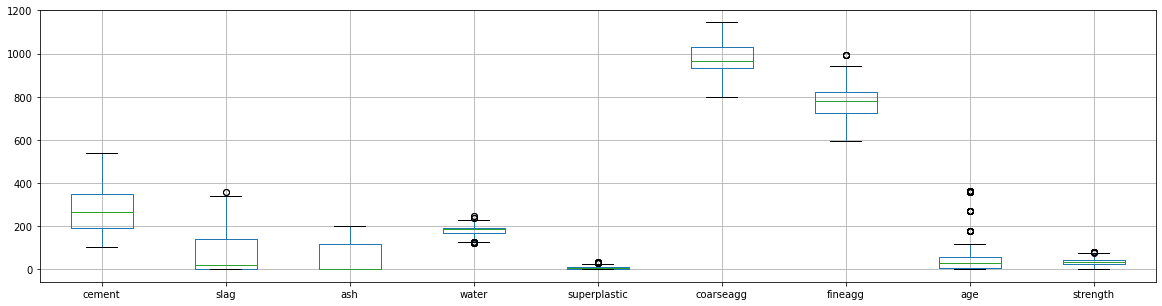

In [22]:
df.boxplot(return_type='axes', figsize=(20,5))

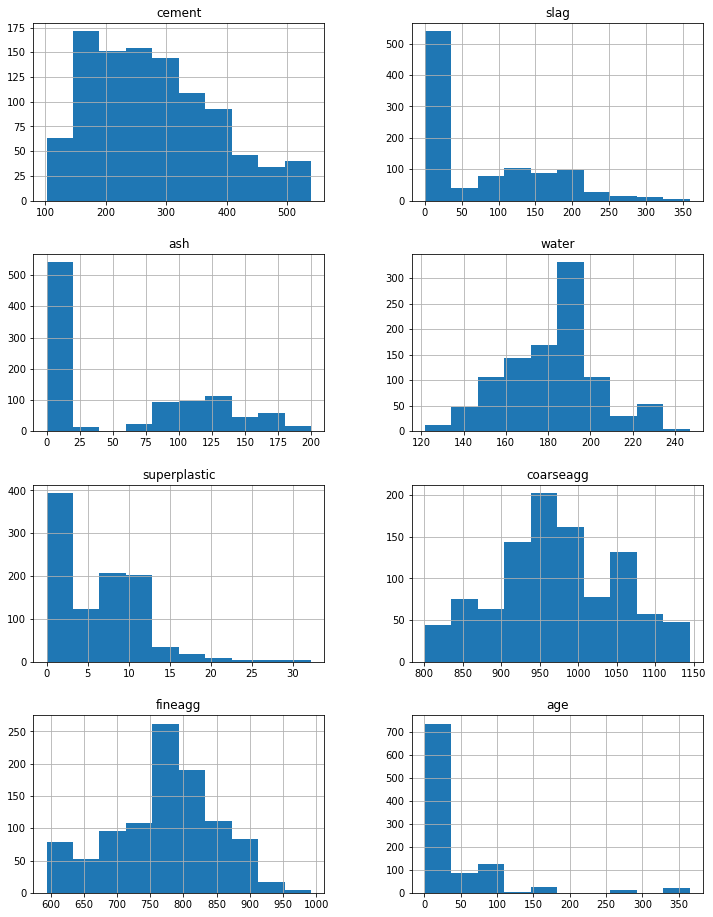

In [23]:
features= df[[i for i in list(df.columns)]].columns
df.drop('strength',axis=1).hist(figsize=(12,16),layout=(4,2));

###### Observations

* Distribition of most of the columns show positive skewness.
* Disributions of attributes namely age, ash, slag and superplastic show high skewness.
* Disribution of cement attribute shows moderate skewness.
* Distributions of coarseagg, fineagg and water look normally distributed.
* Water and coarseag have approximately symmetric distributions.
* Attributes coarseagg and fineagg show negative skewness.
* Box-plots of independent attributes namely slag, water, superplastic, fineagg and age show presence of outliers.
* Target attribute (strength) also has outliers.
* Water attribute shows presence of outliers on both sides of the whiskers.
* Age attribute shows high amount of outliers.

###### Removing Outliers.

In [24]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    iqr = Q3-Q1
    
    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    df.loc[(df[cols]<low) | (df[cols]>high), cols] = df[cols].median()

<AxesSubplot:>

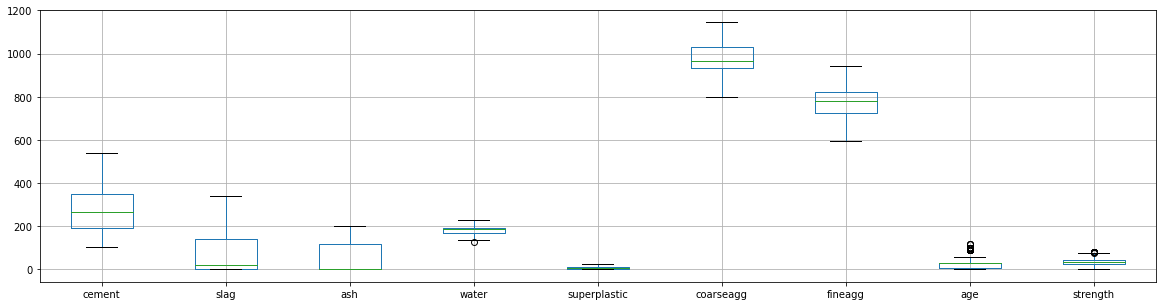

In [25]:
df.boxplot(return_type='axes', figsize=(20,5))

###### 2. Bi-variate analysis between the predictor variables and also between the predictor variables and target column.

<AxesSubplot:>

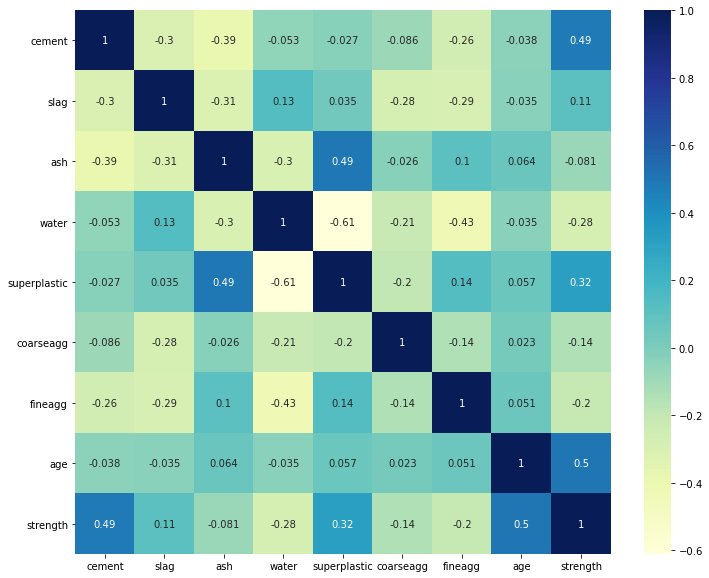

In [26]:
# Let us see how many of them are correlated..
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='strength', ylabel='Density'>

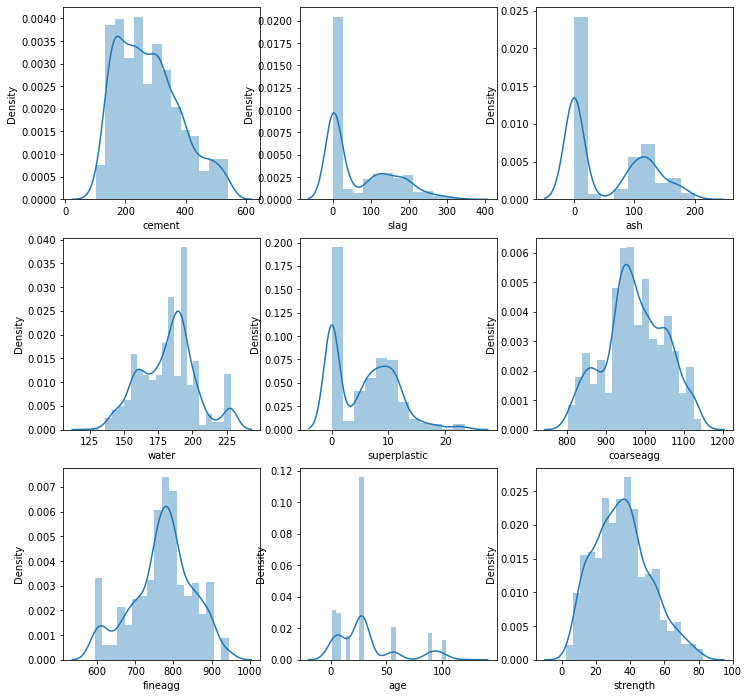

In [28]:
fig, ax2 = plt.subplots(3,3, figsize=(12,12))
sns.distplot(df['cement'], ax=ax2[0][0])
sns.distplot(df['slag'], ax=ax2[0][1])
sns.distplot(df['ash'], ax=ax2[0][2])
sns.distplot(df['water'], ax=ax2[1][0])
sns.distplot(df['superplastic'], ax=ax2[1][1])
sns.distplot(df['coarseagg'], ax=ax2[1][2])
sns.distplot(df['fineagg'], ax=ax2[2][0])
sns.distplot(df['age'], ax=ax2[2][1])
sns.distplot(df['strength'], ax=ax2[2][2])

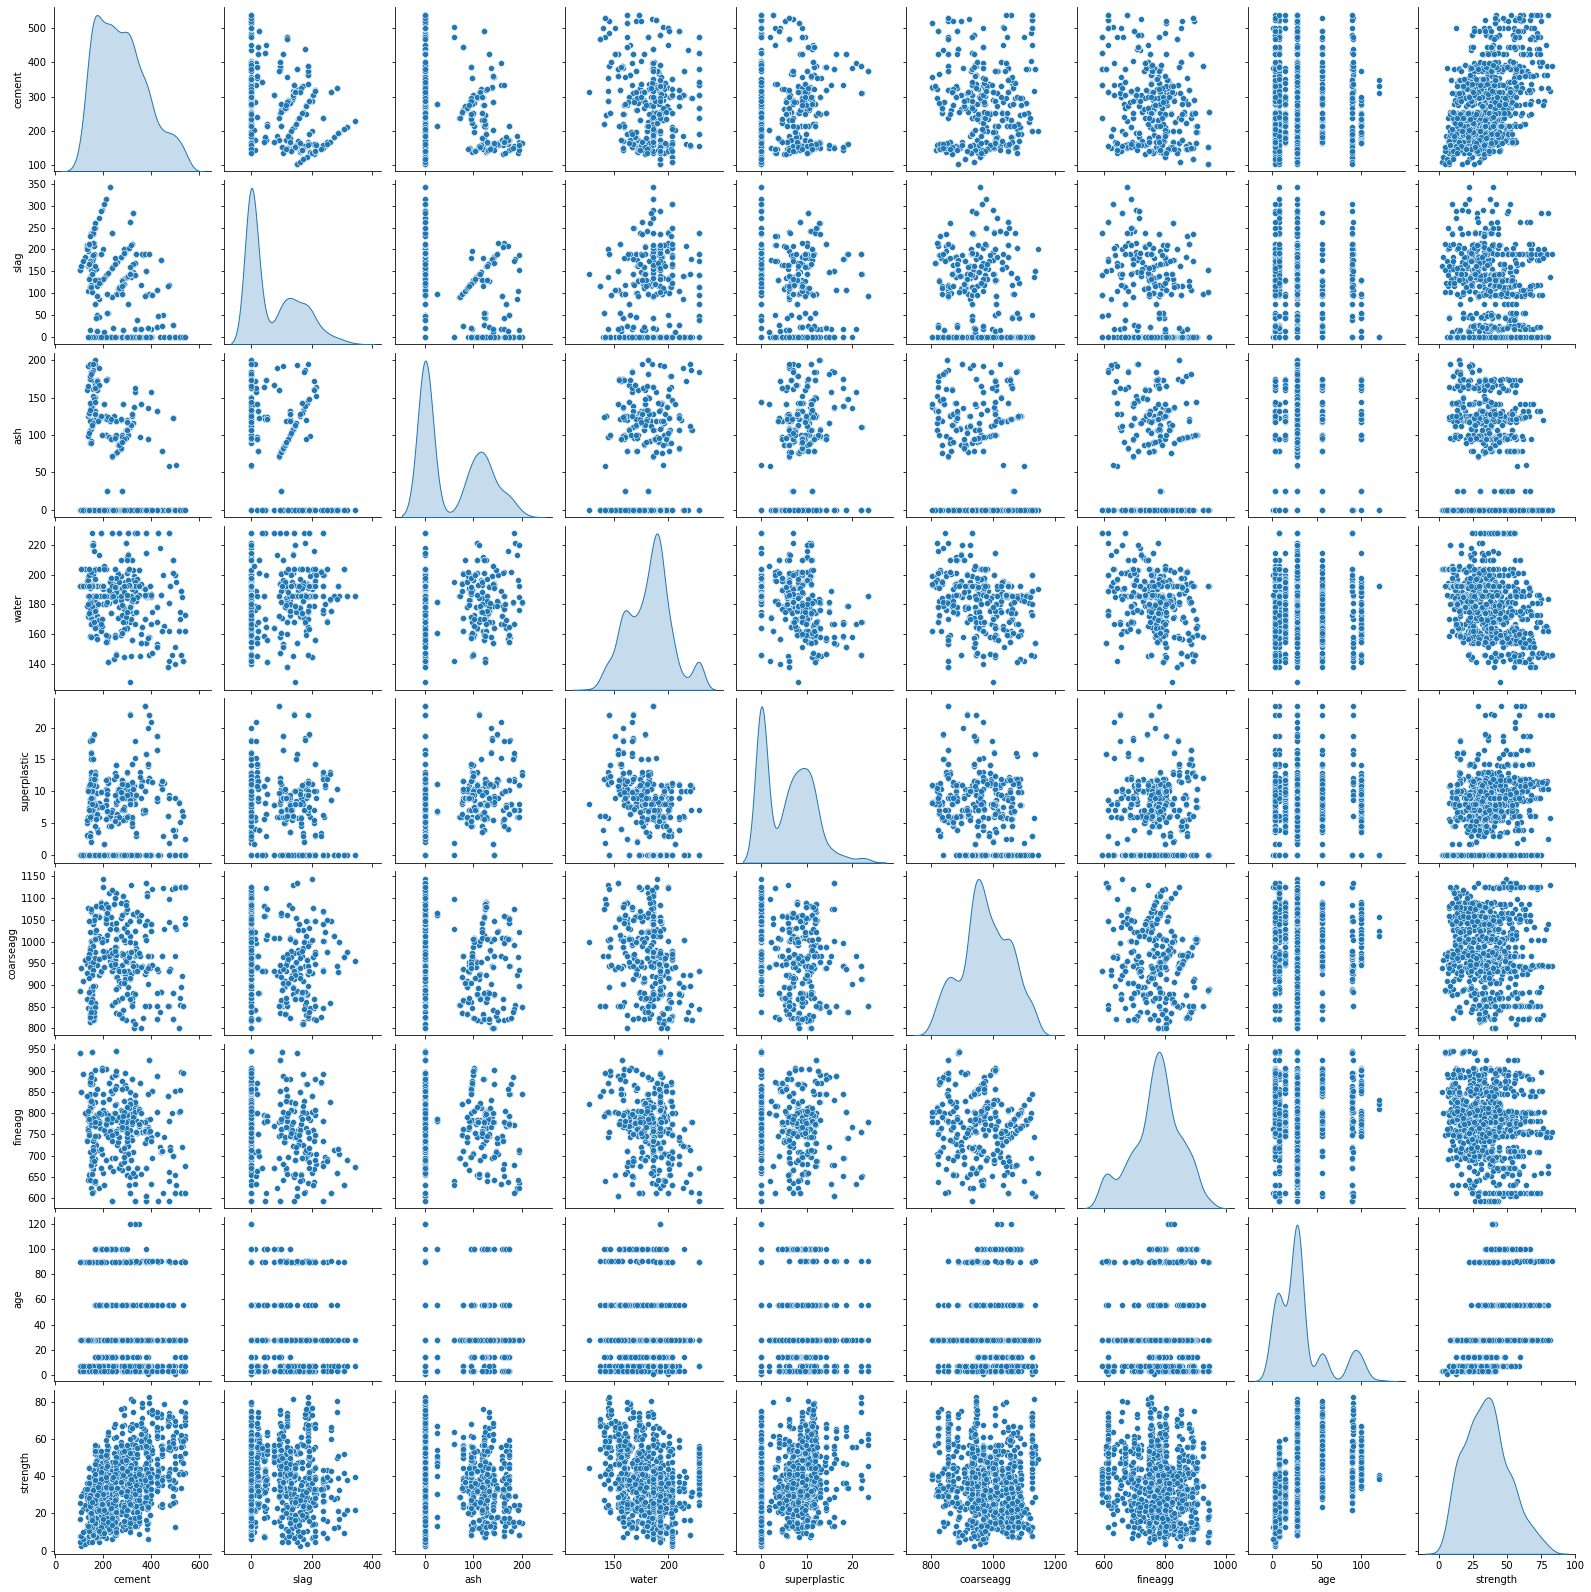

In [27]:
sns.pairplot(df,diag_kind='kde');

###### Observations:


* No very high correlation between any given features.
* Strength have some positive linear relation with cement and some with superplastic, which implied that if the quantity of       cement or superplastic is more then concrete is having more strength.
* More strength is between 20-150 days approx.
* Strength desreases after 250 days approx.
* `There are multiple gaussians in slag,ash,water, superplastic, age.`
* Slag, cement and ash also have a tendency to create linear relation but it's not prominant.
* The highest positive correlation is between Strength and age.
* There are strong correlations between some of the feature variables. 
* Negative correlation between Superplastic and Water.
* Negative correlation between fineagg and Water.
* Negative correlation between Courseagg and Water
* Positive correlation between Superplastic and Ash.
* Water and ash have negative corerelatetion with quiet a few variables.
* Rest of the relation between other individual attributes are mostly formed cloud shape or symmetrical shape.

###### 3.Feature Engineering techniques

In [29]:
# Adding composite feature.
df_model.insert(8,'water_cement_ratio',df_model['water']/df_model['cement'])
# Let's check whether the feature is added properly or not?
df_model.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,1.248708,18.29


In [31]:
X1 = df_model.drop('strength',axis=1)
y1 = df_model['strength']

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X1 = scale.fit_transform(X1)

In [33]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1, test_size=0.3,random_state=1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
lr_model = LinearRegression()

In [36]:
lr_model.fit(X1_train,y1_train)
y1_pred = lr_model.predict(X1_test)
lr_model.score(X1_train,y1_train)

0.6047418142551195

In [37]:
lr_model.score(X1_test,y1_test)

0.6389112629965468

In [39]:
from sklearn.metrics import r2_score

In [40]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y1_pred - y1_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y1_pred - y1_test) ** 2))
print("R2-score: %.2f" % r2_score(y1_pred , y1_test))

Mean absolute error: 8.12
Mean sum of squares (MSE): 105.09
R2-score: 0.41


In [41]:
poly_reg = PolynomialFeatures(degree = 3)
X1_poly = poly_reg.fit_transform(X1_train)
poly_reg.fit(X1_train, y1_train)

PolynomialFeatures(degree=3)

In [44]:
lr_model.fit(X1_poly,y1_train)

LinearRegression()

In [45]:
y1_pred_poly = lr_model.predict(poly_reg.fit_transform(X1_test))

In [46]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y1_pred_poly - y1_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y1_pred_poly - y1_test) ** 2))
print("R2-score: %.2f" % r2_score(y1_pred_poly , y1_test))

Mean absolute error: 5.20
Mean sum of squares (MSE): 61.61
R2-score: 0.80


`It is clearly evident from the above observation that a polynomial model give better results since the value of MAE and MSE decreases in a polynomial model and R2 score gets closer to one. As provided in the dataset information the strength of the concrete is a highly nonlinear function of age and other ingredients. Thus using a quadratic model would definelty help in achieving higher modeling accuracy.` 

#### 4. Creating the Model and Tuning It

`Since this problem is of regression nature, algorithms like 
1.Linear Regression	
2.KNN Regressor	
3.SupportVectorRegressor	
4.DecisionTreeRegressor	
5.AdaboostRegressor	
6.RandomForestRegressor	
7.BaggingRegressor	
8.GradientBoostRegressor	
9.XGboost 
will be helpful in training the model`

In [47]:
X = df.drop('strength',axis=1)
y = df['strength']

In [48]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled,columns=df.columns)

In [49]:
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state=1)

###### Random Forest:

In [50]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
y_pred = rf.predict(X_test)

In [52]:
rf.score(X_train,y_train)

0.9804483710108725

In [53]:
rf.score(X_test,y_test)

0.8821146532367659

In [54]:
acc_rf = metrics.r2_score(y_test,y_pred)
acc_rf

0.8821146532367659

In [55]:
result_df = pd.DataFrame({'Algorithm':['Random Forest'],'Accuracy':acc_rf},index={'1'})
results = result_df[['Algorithm','Accuracy']]                         
results

,Algorithm,Accuracy
1,Random Forest,0.882115


In [56]:
k=20

kfold = KFold(n_splits=k,random_state=42)
K_results_rf = cross_val_score(rf,X,y,cv=kfold)
accuracy = np.mean(abs(K_results_rf))
accuracy

0.9048193339868975

In [57]:
result_df1 = pd.DataFrame({'Algorithm':['Random Forest (K Fold)'],'Accuracy':accuracy},index={'2'})
results = pd.concat([results,result_df1])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819


###### Gradient boosting Regressor

In [58]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [59]:
gb_pred = gb.predict(X_test)

In [90]:
gb_pred_tr = gb.predict(X_train)

In [60]:
acc_gb = metrics.r2_score(y_test,gb_pred)
acc_gb

0.8905344802774126

In [61]:
gb.score(X_train,y_train)

0.9416564212396722

In [62]:
gb.score(X_test,y_test)

0.8905344802774126

In [63]:
df3 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'],'Accuracy':acc_gb},index={'3'})
results = pd.concat([results,df3])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534


###### Gradient Boosting Regressor K Fold cross validation.

In [64]:
k=20

kfold = KFold(n_splits=k,random_state=42)
gb_results = cross_val_score(gb,X,y,cv=kfold)
gb_accuracy = np.mean(abs(gb_results))
gb_accuracy

0.8915964713972393

In [65]:
df4 = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor (K Fold)'],'Accuracy':gb_accuracy},index={'4'})
results = pd.concat([results,df4])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534
4,Gradient Boosting Regressor (K Fold),0.891596


######  Ada Boosting Regressor.

In [66]:
ab = AdaBoostRegressor()
ab.fit(X_train,y_train)

AdaBoostRegressor()

In [67]:
ab.score(X_train,y_train)

0.8144005525460238

In [68]:
ab.score(X_test,y_test)

0.7636467425049603

In [69]:
ab_pred = ab.predict(X_test)

In [70]:
acc_ad = metrics.r2_score(y_test,ab_pred)
acc_ad

0.7636467425049603

In [71]:
df5 = pd.DataFrame({'Algorithm':['AdaBoost Regressor'],'Accuracy':acc_ad},index={'5'})
results = pd.concat([results,df5])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534
4,Gradient Boosting Regressor (K Fold),0.891596
5,AdaBoost Regressor,0.763647


In [72]:
k=20

kfold = KFold(n_splits=k,random_state=42)
ab_results = cross_val_score(ab,X,y,cv=kfold)
ab_accuracy = np.mean(abs(ab_results))
ab_accuracy

0.7651161299544967

In [73]:
df6 = pd.DataFrame({'Algorithm':['AdaBoosting Regressor (K Fold)'],'Accuracy':ab_accuracy},index={'6'})
results = pd.concat([results,df6])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534
4,Gradient Boosting Regressor (K Fold),0.891596
5,AdaBoost Regressor,0.763647
6,AdaBoosting Regressor (K Fold),0.765116


###### Bagging Regressor

In [74]:
bg = BaggingRegressor()
bg.fit(X_train,y_train)

BaggingRegressor()

In [75]:
bg.score(X_train,y_train)

0.972101542146682

In [76]:
bg.score(X_test,y_test)

0.8611488540051422

In [77]:
bg_pred = bg.predict(X_test)

In [78]:
acc_bg = metrics.r2_score(y_test,bg_pred)
acc_bg

0.8611488540051422

In [79]:
df7 = pd.DataFrame({'Algorithm':['Bagging Regressor'],'Accuracy':acc_bg},index={'7'})
results = pd.concat([results,df7])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534
4,Gradient Boosting Regressor (K Fold),0.891596
5,AdaBoost Regressor,0.763647
6,AdaBoosting Regressor (K Fold),0.765116
7,Bagging Regressor,0.861149


###### Bagging Regressor Kfold Validation.

In [88]:
k=20

kfold = KFold(n_splits=k,random_state=40)
bg_results = cross_val_score(bg,X,y,cv=kfold)
bg_accuracy = np.mean(abs(bg_results))
bg_accuracy

0.89582736955073

In [89]:
df8 = pd.DataFrame({'Algorithm':['Bagging Regressor (K Fold)'],'Accuracy':bg_accuracy},index={'8'})
results = pd.concat([results,df8])
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.882115
2,Random Forest (K Fold),0.904819
3,Gradient Boosting Regressor,0.890534
4,Gradient Boosting Regressor (K Fold),0.891596
5,AdaBoost Regressor,0.763647
6,AdaBoosting Regressor (K Fold),0.765116
7,Bagging Regressor,0.861149
8,Bagging Regressor (K Fold),0.895827


###### 3.Techniques employed to squeeze that extra performance out of the model without making it overfit.

`Note: Running Grid Search was consuming a lot of time (> 40 min). Therefore models have been tuned using readom search.`

In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_grid = dict(n_estimators = [100,500,1000], learning_rate = [0.1,0.05,0.02,0.01], max_depth = [4,6], 
            min_samples_leaf = [3,5,9,17], max_features = [1.0,0.3,0.1])

search = RandomizedSearchCV(gb,random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.906):
{'n_estimators': 500, 'min_samples_leaf': 3, 'max_features': 0.1, 'max_depth': 6, 'learning_rate': 0.02}


In [101]:
gbcv = GradientBoostingRegressor(n_estimators = 500, 
                                 min_samples_leaf = 3, 
                                 max_features = 0.1, 
                                 max_depth = 6, 
                                 learning_rate = 0.02)

gbcv.fit(X_train,y_train)
gbcv.score(X_train,y_train)
y_pred_gbtr=gbcv.predict(X_train)
y_pred_gbte=gbcv.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))

acc_gbcv = metrics.r2_score(y_test,y_pred_gbte)

Train R2 score:  0.9795122477842823
Test R2 score:  0.9133919019772638


In [115]:
result_df_rs = pd.DataFrame({'Random Search':['GBR- Train R2 score'],'Accuracy':acc_gbcv},index={'1'})
results_rs1 = result_df_rs[['Random Search','Accuracy']]                         
results_rs1

,Random Search,Accuracy
1,GBR- Train R2 score,0.913392


In [106]:
random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [107]:
search_rf = RandomizedSearchCV(rf,random_grid, n_iter = 5, cv = kfold, scoring = 'explained_variance', n_jobs=-1)
search_rf.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search_rf.best_score_)
print(search_rf.best_params_)

Best parameter (CV score=0.895):
{'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [109]:
rfcv = RandomForestRegressor(n_estimators = 230, 
                                 min_samples_split = 2, 
                                 min_samples_leaf = 1, 
                                 max_features = 'auto', 
                                 max_depth = 100, 
                                 bootstrap = True)

rfcv.fit(X_train,y_train)
rfcv.score(X_train,y_train)
y_pred_rftr=rfcv.predict(X_train)
y_pred_rfte=rfcv.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_rftr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfte))

acc_rfcv = metrics.r2_score(y_test,y_pred_rfte)

Train R2 score:  0.9818232832612526
Test R2 score:  0.8805713196346352


In [116]:
result_df_rs2 = pd.DataFrame({'Random Search':['RF- Train R2 score'],'Accuracy':acc_rfcv},index={'2'})
results_rs1 = pd.concat([results_rs1,result_df_rs2])
results_rs1 = results_rs1[['Random Search','Accuracy']]
results_rs1

,Random Search,Accuracy
1,GBR- Train R2 score,0.913392
2,RF- Train R2 score,0.880571


`With Hyper parameter tuining the accuracy of Gradient boosting regressor has increased, while that of Randon forest have remained the same.`

###### 5. Write the significance of the R2 score from the business perspective.

R2 (Coefficient of determination) is usually used to test the accuracy of the trained model. The coefficient of determination is a measure of how well the independent variables considered account for the measures dependent variable. 
A higher R2 indicates a better prediction relationship. Models with highest R2 values for each system model are more confident about the results. An increse in R2 score indicates a strong prediction while a decrese indicates a weak prediction.

###### 6. Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis.

* The highest positive correlation is between Strength and age followed by cement and strength, and also superlastic and ash.
* Age and Superplastic also have a positive impact on the Compressive Strength.
* There are strong correlations between some of the feature variables. 
* We can see a highly negative correlation between Superplastic and Water, but a positive correlation between Superplastic and Ash.

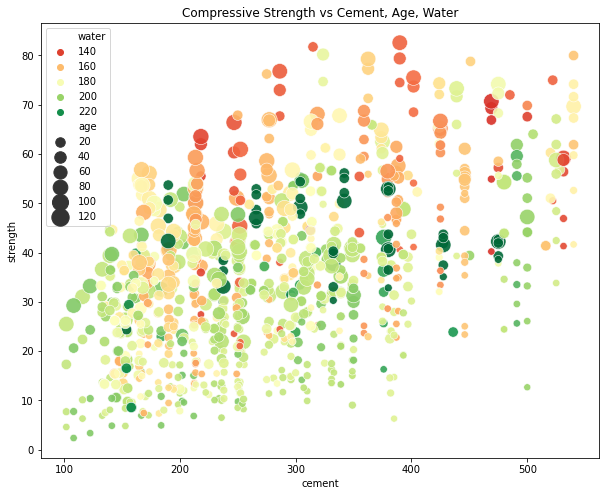

In [120]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlGn', alpha=0.9)
ax.set_title("Compressive Strength vs Cement, Age, Water")
ax.legend()
plt.show()

From this plot we can make some sensible observations on the relationships between these variables and strength:

* Strength correlates positively with Cement.
* Strength correlates positively with Age, though less than Cement.
* Older Cement tends to require more Water, as shown by the larger green data points.
* Strength correlates negatively with Water.
* High Strength with a low Age requires more Cement.

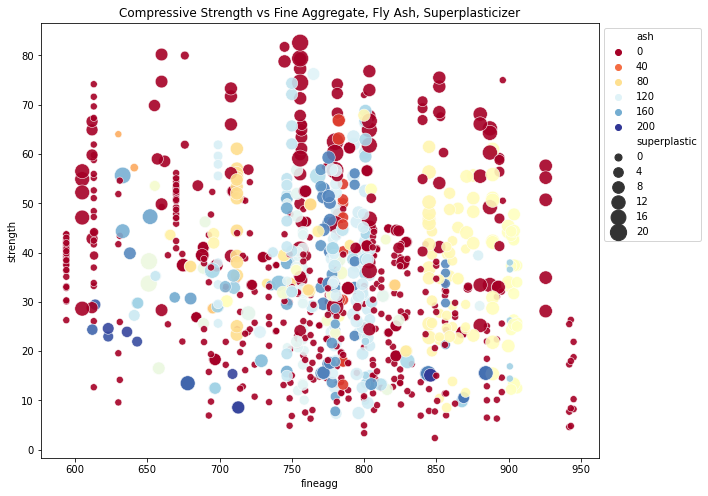

In [121]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Compressive Strength vs Fine Aggregate, Fly Ash, Superplasticizer")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

From the above plot we can make further observations on the relationships between second set of variables and strength:

* Strength correlates negatively with Ash.
* Strength correlates positively with Superplastic.

Through some very simple charts we have discovered relationships between ingredients that allow us to make predictions on what our future model will value when seeking a high compressive strength.

It is likely that the ideal concrete mixture (when prioritising compressive strength) will consist of:

* Large quantity of Cement
* Potentially a long aging process however this comes at the cost of adding Water, which negatively impacts the strength
* Large quantity of Superplastic

<AxesSubplot:>

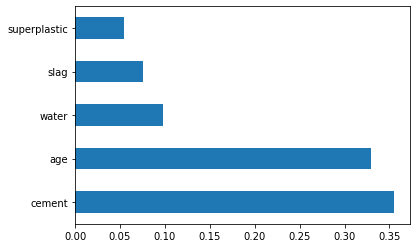

In [123]:
X_featurenames = X.columns
feat_importances = pd.Series(rf.feature_importances_, index = X_featurenames)
feat_importances.nlargest(5).plot(kind = 'barh')

* It can be observed that the Cement has the highest influence in the model, followed by Age. We will further justify the observations using SHAP values.

In [124]:
import shap

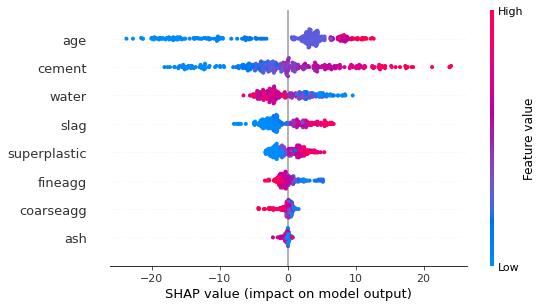

In [125]:
ex = shap.TreeExplainer(rf)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The summary plot shows that: 
* Top three influential variables are Age of concrete, Cement content and water content, which determines the characteristics strength of concrete. 
* The Age variable has a high range of values and it has a positive impact on strength. As concrete’s age increases its characteristics compressive strength also increases. 
* Cement also has a positive influence. It is worthwhile to note that water content has a negative impact on compressive strength. 
* If we add more and more water the concrete strength will reduce respectively. 
* Superplastic and fineagg have a positive impact on strength. Similarly, the addition of more fine and coarseagg reduces the strength.

`What can be done further is to tranform the dataset to a polynomial model of different degrees and futher study the accuracy using different matrices. Lasso or Ridge regression techniques can be used get rid of low value features when studying  the polynomial model. The contribution of each idependent variable can be studied in futher details using SHAP values. The accuracy of the model can futher be studied using algorithms like Xgboost and CatBoost. Feature engineering techniques should be used to discover new variables from different combinations. In our study above the best model was observed to be Random Forest (K Fold) where an accuracy 0.904819 was achieved on test data.`